<a href="https://colab.research.google.com/github/moon4sake/ms_thesis/blob/main/shapley_value_approximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as dsets
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics
%matplotlib inline

import time
import math
from itertools import permutations
from math import factorial
from collections import defaultdict

# np.random.seed(2020)

# Synthetic Dataset

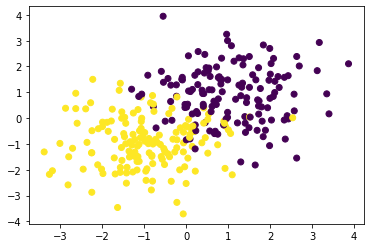

In [5]:
n = 300

data_blobs = dsets.make_blobs(n_samples = n*2,
                              n_features = 2,
                              centers = [[1, 1], [-1, -1]])

# data_moons = dsets.make_moons(n_samples = n*2,
#                               shuffle = True,
#                               noise = 0.1)


X_train, X_test, y_train, y_test = train_test_split(data_blobs[0], 
                                                    data_blobs[1], 
                                                    test_size = 0.5)


plt.scatter([x[0] for x in X_train], [x[1] for x in X_train], c = y_train)
plt.savefig('data')

#Shapley Value Approximation

In [ ]:
clf = svm.SVC(kernel = 'rbf')

# calculating shapley value

sha = defaultdict(list)
for x in X_train:
    sha[tuple(x)].append(0)

epoch = 500

center_x = [[1, 1], [-1, -1]]
center_y = [0, 1]
train_data = [(X_train[j], y_train[j]) for j in range(n)]

t = 0

start_time = time.time()


while True:
    if t > epoch: break
    else: print(t)

    t += 1
    p = np.random.permutation(np.array(train_data))
    v_before, v_now = 0, 0

    stop = 0
    for j in range(n):
        clf.fit(center_x + [p[k][0] for k in range(1, j+1)], 
                center_y + [p[k][1] for k in range(1, j+1)])
        y_pred = clf.predict(X_test)
        v_now = metrics.accuracy_score(y_test, y_pred)
        
        sha[tuple(p[j][0])].append(((t-1) * sha[tuple(p[j][0])][-1]
                                      + v_now - v_before) / t)
        
        if abs(sha[tuple(p[j][0])][-1] - sha[tuple(p[j][0])][-2]) < 0.0005:
            stop += 1

        # print(p[j-1])
        v_before = v_now
    if stop == n-1:
        print(f"Convergence condition met on epoch {t}")
        break

t = time.time() - start_time
h = int(t/3600)
m = int((t - h*3600)/60)
s = t - h*3600 - m*60
print("--- %s hours  %s minutes  %s seconds---" %(h, m, s))

for x in X_train:
    plt.plot(sha[tuple(x)])
plt.xlabel('iterations')
plt.title('Shapley value')
plt.savefig('test')
print(sum([sha[tuple(x)][-1] for x in X_train]))
print([sha[tuple(x)][-1] for x in X_train])


#Results

In [ ]:
t = [sha[tuple(x)][-1] for x in X_train]
t.sort()
c = 0
n = 0
for x in t[::-1]:
    n += 1
    c += x
    plt.scatter(n, c, marker='.', c='blue', s=5)
plt.xlabel('number of data')
plt.title('accuracy')
plt.savefig('accuracy_shapley')

In [ ]:
for x in X_train[:10]:
    plt.plot(sha[tuple(x)])
plt.xlabel('iterations')
plt.title('shapley_fictitious_10')
plt.savefig('shapley_fictitious_10')